In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import mysql.connector
#python-mysql connection
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="7660803965",
    database='amazonbestseller',
    use_pure=True
)
cursor = mydb.cursor()
print(mydb)

In [4]:
df=pd.read_csv(r"D:\Revature_Training\python\Project\best_sellers_data2.csv")
# amazon_data=pd.DataFrame(df)
# amazon_data
df

,product_title,product_price,product_star_rating,product_num_ratings,rank,country
0,"TurboTax Deluxe 2024 Tax Software, Federal & S...",$55.99,4.2,6511.0,1,US
1,"TurboTax Premier 2024 Tax Software, Federal & ...",$82.99,4.1,2738.0,2,US
2,"TurboTax Home & Business 2024 Tax Software, Fe...",$95.99,4.2,1672.0,3,US
3,"TurboTax Business 2024 Tax Software, Federal T...",$143.99,4.0,389.0,4,US
4,H&R Block Tax Software Deluxe + State 2024 wit...,$49.97,3.9,1683.0,5,US
...,...,...,...,...,...,...
2418,ġAFENOㅀ ŗecεiveㅀ]Sangle Mascarade Šèxy Tòy Lês...,"€ 22,99",NaN,NaN,96,NL
2419,Poser 12 | The Premier 3D Rendering & Animatio...,"€ 52,98",3.6,29.0,97,NL
2420,LYHM DIY 5D Diamond Painting Kits voor Volwass...,"€ 11,99",5.0,1.0,98,NL
2421,Nero Platinum 2019 Box|Platinum|1|One time|PC|...,NaN,4.4,219.0,99,NL


# data preprocessing

In [5]:
if df.empty:
    print("file is empty")
else:
    print("no errors")

no errors


In [6]:
#Loading the datasets into a data frame

amazon_data=pd.DataFrame(df)
# amazon_data.info()
amazon_data.columns

Index(['product_title', 'product_price', 'product_star_rating',
       'product_num_ratings', 'rank', 'country'],
      dtype='object')

In [7]:
#striipping the extra characters like currency symbols
import re
amazon_data.columns = amazon_data.columns.str.strip()
amazon_data['product_price'] = amazon_data['product_price'].astype(str).apply(
    lambda x: re.sub(r'[^\d\.]', '', x)
)

In [8]:
# print("\nDuplicate Rows:", amazon_data.duplicated().sum())
amazon_data.drop_duplicates(inplace=True)
print("\nDuplicate Rows:", amazon_data.duplicated().sum())



Duplicate Rows: 0


In [9]:
print(amazon_data["product_price"].dtype)
print(amazon_data["product_price"].head(10))


object
0     55.99
1     82.99
2     95.99
3    143.99
4     49.97
5     47.99
6    140.99
7     41.97
8     72.99
9     15.00
Name: product_price, dtype: object


In [10]:
amazon_data.shape

(1591, 6)

In [11]:

amazon_data['product_num_ratings'].isnull().sum()
amazon_data['product_num_ratings'].dtype
amazon_data['product_star_rating'].dtype

dtype('float64')

In [12]:
amazon_data.isnull().sum()

product_title            0
product_price            0
product_star_rating     95
product_num_ratings    251
rank                     0
country                  0
dtype: int64

In [13]:
#converting the the dtype 
amazon_data["product_price"] = pd.to_numeric(amazon_data["product_price"], errors="coerce")
#handling missing valueas and null values
amazon_data["product_price"].fillna(amazon_data["product_price"].mean(),inplace=True)
amazon_data['product_star_rating'].fillna(amazon_data['product_star_rating'].mean(),inplace=True)
amazon_data['product_num_ratings'].fillna(amazon_data['product_num_ratings'].mean(),inplace=True)

In [14]:
amazon_data.head()

,product_title,product_price,product_star_rating,product_num_ratings,rank,country
0,"TurboTax Deluxe 2024 Tax Software, Federal & S...",55.99,4.2,6511.0,1,US
1,"TurboTax Premier 2024 Tax Software, Federal & ...",82.99,4.1,2738.0,2,US
2,"TurboTax Home & Business 2024 Tax Software, Fe...",95.99,4.2,1672.0,3,US
3,"TurboTax Business 2024 Tax Software, Federal T...",143.99,4.0,389.0,4,US
4,H&R Block Tax Software Deluxe + State 2024 wit...,49.97,3.9,1683.0,5,US


In [15]:
amazon_data['product_title'].dtype
# amazon_data.columns
amazon_data=amazon_data.rename(columns={'rank':'countryRank'})
amazon_data.columns

Index(['product_title', 'product_price', 'product_star_rating',
       'product_num_ratings', 'countryRank', 'country'],
      dtype='object')

In [16]:
for _,row in amazon_data.iterrows():
    cursor.execute("""
        INSERT INTO amazon (
            product_title, 
            product_price, 
            product_star_rating, 
            product_num_ratings, 
            countryRank, 
            country
        ) VALUES (%s, %s, %s, %s, %s, %s)
    """, (
        row['product_title'],
        row['product_price'],
        row['product_star_rating'],
        row['product_num_ratings'],
        row['countryRank'],
        row['country']
    ))

    

In [17]:
mydb.commit()
# cursor.close()
# mydb.close()
for _, row in amazon_data.iterrows():
    print(f"Row index: {_}, Title: {row['product_title']}")

print("Data inserted into table successfully!")

Row index: 0, Title: TurboTax Deluxe 2024 Tax Software, Federal & State Tax Return [PC/MAC Download]
Row index: 1, Title: TurboTax Premier 2024 Tax Software, Federal & State Tax Return [PC/MAC Download]
Row index: 2, Title: TurboTax Home & Business 2024 Tax Software, Federal & State Tax Return [PC/MAC Download]
Row index: 3, Title: TurboTax Business 2024 Tax Software, Federal Tax Return [PC Download]
Row index: 4, Title: H&R Block Tax Software Deluxe + State 2024 with Refund Bonus Offer (Amazon Exclusive) Win/Mac [PC/Mac Online Code]
Row index: 5, Title: TurboTax Deluxe 2024 Tax Software, Federal Tax Return [PC/MAC Download]
Row index: 6, Title: Microsoft Office Home 2024 | Classic Apps: Word, Excel, PowerPoint | One-Time Purchase for 1 PC/MAC | Instant Download | Form
Row index: 7, Title: H&R Block Tax Software Deluxe 2024 Win/Mac with Refund Bonus Offer (Amazon Exclusive) [PC/Mac Online Code]
Row index: 8, Title: H&R Block Tax Software Premium 2024 Win/Mac with Refund Bonus Offer (Am

In [18]:

sql_q = "SELECT product_title, product_star_rating FROM amazon ORDER BY product_star_rating DESC LIMIT 10;"
cursor.execute(sql_q)

if cursor.with_rows:
    rows = cursor.fetchall()
    top_rated = pd.DataFrame(rows, columns=["Product Title", "Star Rating"])
    print(top_rated)
else:
    print("No data found.")

    


                                       Product Title Star Rating
0  Mullvad VPN | 5 Devices for 6 Months | Protect...           5
1                                         ARC Studio           5
2  Malwarebytes Premium | 1 Year, 5 Device | Wind...           5
3  [Old Version] Intuit TurboTax Deluxe 2021, Fed...           5
4  Microsoft 365 Family - 1 Year Subscription [Di...           5
5  TurboTax Premier 2024 Tax Software, Federal & ...           5
6  [Old Version] Intuit TurboTax Home & Business ...           5
7  Quick Books Desktop Pro 2024 | 3 User's | NO D...           5
8  Malwarebytes Premium | Amazon Exclusive | 18 M...           5
9  Mullvad VPN | 12 Months for 5 Devices | Protec...           5


# price trend analysis

In [19]:
print(amazon_data["product_price"].describe())
amazon_data.head()

count      1591.000000
mean       5880.579567
std       16393.063797
min           0.010000
25%          83.445000
50%        1998.000000
75%        5880.579567
max      232000.000000
Name: product_price, dtype: float64


,product_title,product_price,product_star_rating,product_num_ratings,countryRank,country
0,"TurboTax Deluxe 2024 Tax Software, Federal & S...",55.99,4.2,6511.0,1,US
1,"TurboTax Premier 2024 Tax Software, Federal & ...",82.99,4.1,2738.0,2,US
2,"TurboTax Home & Business 2024 Tax Software, Fe...",95.99,4.2,1672.0,3,US
3,"TurboTax Business 2024 Tax Software, Federal T...",143.99,4.0,389.0,4,US
4,H&R Block Tax Software Deluxe + State 2024 wit...,49.97,3.9,1683.0,5,US


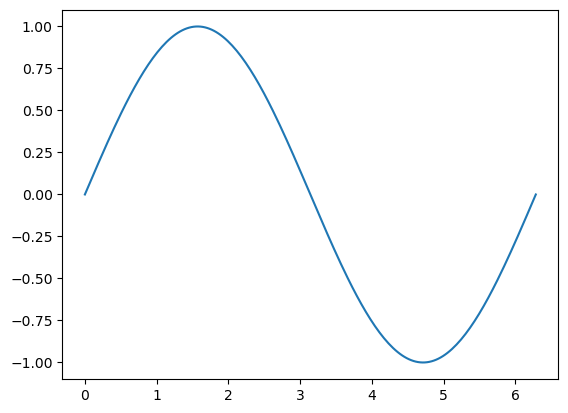

C:\Users\91766\AppData\Local\Temp\ipykernel_18500\2715464024.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


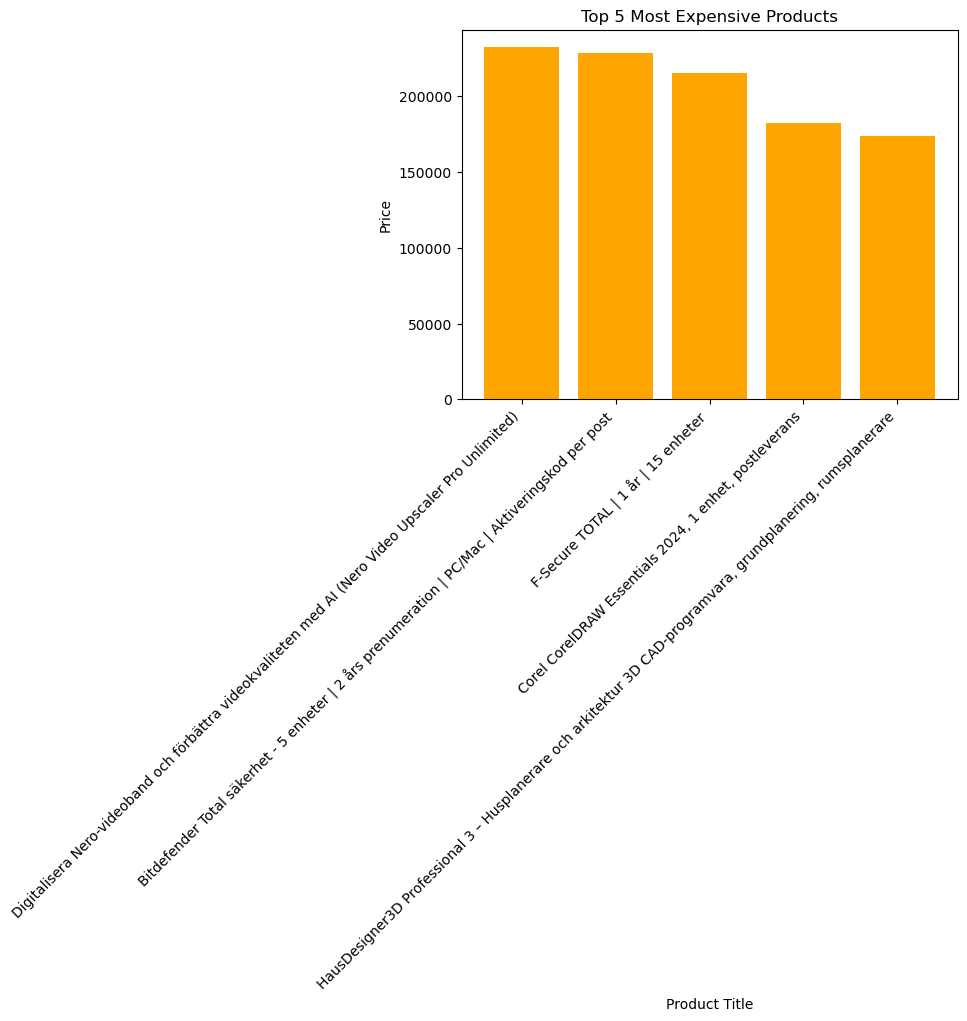

In [21]:
top5 = amazon_data.sort_values('product_price', ascending=False).head(5)

plt.bar(top5['product_title'], top5['product_price'], color='orange')
plt.xlabel("Product Title")
plt.ylabel("Price")
plt.title("Top 5 Most Expensive Products")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [22]:
# filtered_data
max_price=amazon_data["product_price"].max()
min_price=amazon_data["product_price"].min()
max_price,min_price
filter_data=amazon_data[amazon_data["product_price"]<500]
filter_data["product_price"].max()

490.0

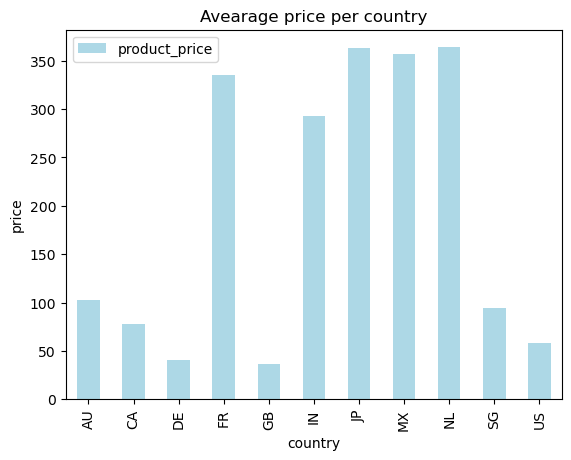

In [23]:
#comparing the avearage prices by the country

avearage_price_country=filter_data.groupby("country")["product_price"].mean()
# plt.plot("avearage_price_country",amazon_data["country"])
avearage_price_country.plot(kind="bar",color="lightblue")
plt.ylabel("price")
plt.title("Avearage price per country")
plt.xlabel("country")
plt.legend()

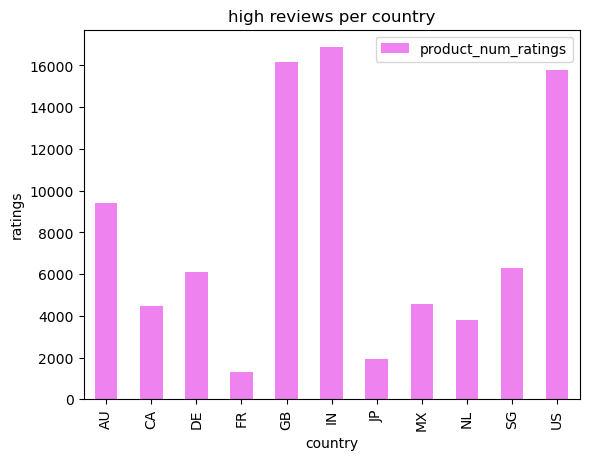

In [24]:
#country having high rated reiews

avearage_price_country=filter_data.groupby("country")["product_num_ratings"].max()
# plt.plot("avearage_price_country",amazon_data["country"])
avearage_price_country.plot(kind="bar",color="violet")
plt.ylabel("ratings")
plt.title("high reviews per country")
plt.xlabel("country")
plt.legend()
plt.show()

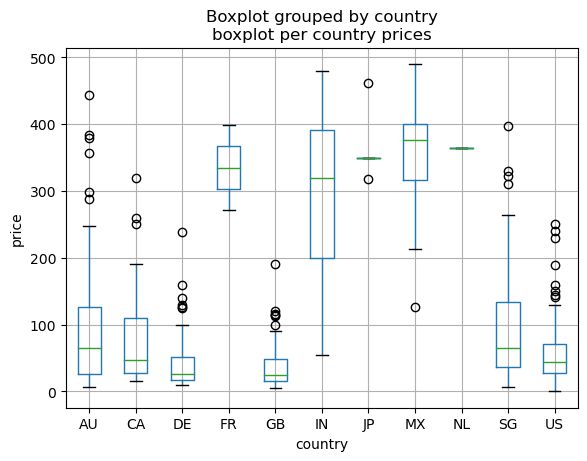

In [25]:
filter_data.boxplot(column="product_price",by="country")
plt.title("boxplot per country prices")
plt.xlabel("country")
plt.ylabel("price")
plt.show()

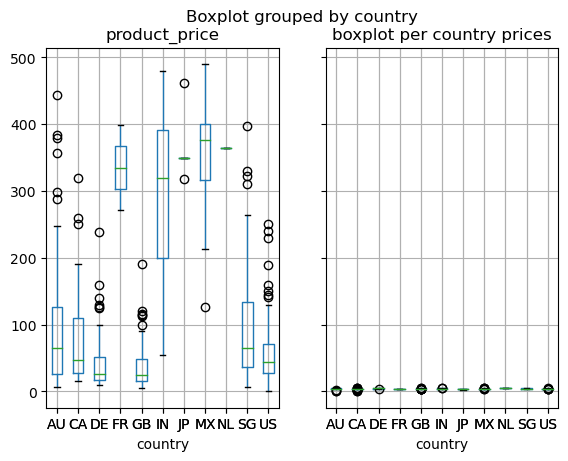

In [26]:
filter_data.boxplot(column=["product_price","product_star_rating"],by="country")
plt.title("boxplot per country prices")
plt.xlabel("country")
plt.ylabel("price")
plt.show()

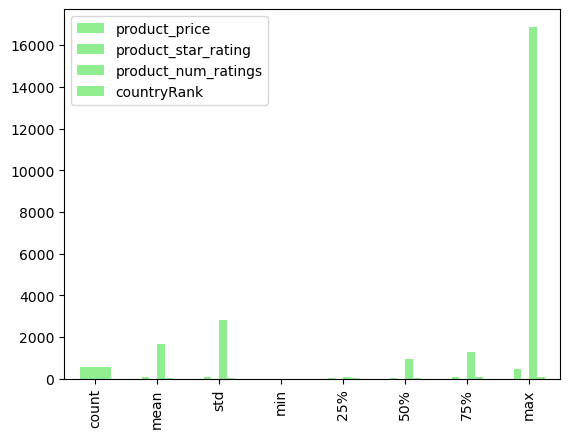

,product_title,product_price,product_star_rating,product_num_ratings,countryRank,country
0,"TurboTax Deluxe 2024 Tax Software, Federal & S...",55.99,4.2,6511.0,1,US
1,"TurboTax Premier 2024 Tax Software, Federal & ...",82.99,4.1,2738.0,2,US
2,"TurboTax Home & Business 2024 Tax Software, Fe...",95.99,4.2,1672.0,3,US
3,"TurboTax Business 2024 Tax Software, Federal T...",143.99,4.0,389.0,4,US
4,H&R Block Tax Software Deluxe + State 2024 wit...,49.97,3.9,1683.0,5,US


In [27]:
des_data=filter_data.describe()
des_data.plot(kind="bar",color=("lightgreen"))
ax.tick_params(axis='y', labelsize=100)
plt.show()
filter_data.head()

In [28]:
#to identify is ther any corealtion between product price and other coloumns
corr_rank=amazon_data["product_price"].corr(amazon_data["countryRank"])

corr_star=amazon_data["product_price"].corr(amazon_data["product_star_rating"])

corr_num=amazon_data["product_price"].corr(amazon_data["countryRank"])
print(corr_rank,corr_star,corr_num)


0.012695709125703709 -0.021306550257073405 0.012695709125703709


# top software categories

In [29]:
amazon_data['category'] = amazon_data['product_title'].str.extract(r'(?P<category>\b(?:Antivirus|Office|VPN|Security|Editor|Backup|Cloud|Windows|Linux|Utility)\b)', expand=True)
amazon_data['category'].dropna()

6          Office
11       Security
12      Antivirus
13      Antivirus
16      Antivirus
          ...    
2143       Office
2205    Antivirus
2214          VPN
2218    Antivirus
2219    Antivirus
Name: category, Length: 953, dtype: object

In [30]:
top_software_review=filter_data.sort_values(by="product_num_ratings",ascending=False)
top_software_review.head()
category_reviews=amazon_data.groupby("category")["product_num_ratings"].sum().sort_values(ascending=False)
category_reviews



category
Antivirus    419017.216418
Security     356806.970149
Windows      161316.798507
VPN          117732.947761
Office       114150.947761
Cloud         28548.559701
Backup         7059.731343
Editor         4197.365672
Linux          4039.097015
Name: product_num_ratings, dtype: float64

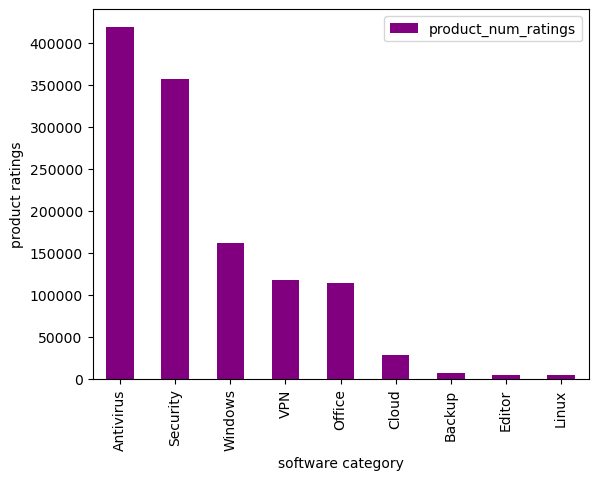

In [31]:
category_reviews.plot(kind="bar",color="purple")
plt.xlabel("software category")
plt.ylabel("product ratings")
plt.legend()
plt.show()

In [32]:
#product has highest ratings
amazon_data.groupby("category").agg({
    "product_num_ratings":["max",min],
    "product_price":["max","min"]
}).head(1)

product_num_ratings      product_price      
                          max  min           max   min
category                                              
Antivirus             16876.0  1.0        7999.0  5.99

# Calculating average ratings and review counts per category or brand

In [33]:
#top rated softwarex
average_ratings=amazon_data.groupby("category")["product_num_ratings"].mean()
average_ratings.head(10)

category
Antivirus    2159.882559
Backup       1176.621891
Cloud        1241.241726
Editor        220.913983
Linux         577.013859
Office        913.207582
Security     1444.562632
VPN           834.985445
Windows       844.590568
Name: product_num_ratings, dtype: float64

In [34]:
# software ratings of top 5 brand brand
star_ratings=amazon_data.groupby("category"
).agg({
    "product_star_rating": "sum"
}).sort_values(by="product_star_rating",ascending=False)
star_ratings.rename(columns={
    "product_star_rating": "star_rating"
},inplace=True)
star_ratings.head()

,star_rating
category,
Security,1056.779947
Antivirus,808.079947
Windows,750.869920
VPN,581.773262
Office,498.283289


In [35]:
#avearage software ratings per brand
aver_ratings=amazon_data.groupby("category"
).agg({
    "product_star_rating": "mean",
    "product_num_ratings": "sum"
}).sort_values(by="product_num_ratings",ascending=False)
aver_ratings.rename(columns={
    "product_star_rating": "avg_rating",
    "product_num_ratings": "total_reviews"
},inplace=True)
aver_ratings

,avg_rating,total_reviews
category,,
Antivirus,4.165361,419017.216418
Security,4.278461,356806.970149
Windows,3.931256,161316.798507
VPN,4.126052,117732.947761
Office,3.986266,114150.947761
Cloud,4.147390,28548.559701
Backup,3.799443,7059.731343
Editor,3.605087,4197.365672
Linux,4.284282,4039.097015


<Axes: xlabel='category'>

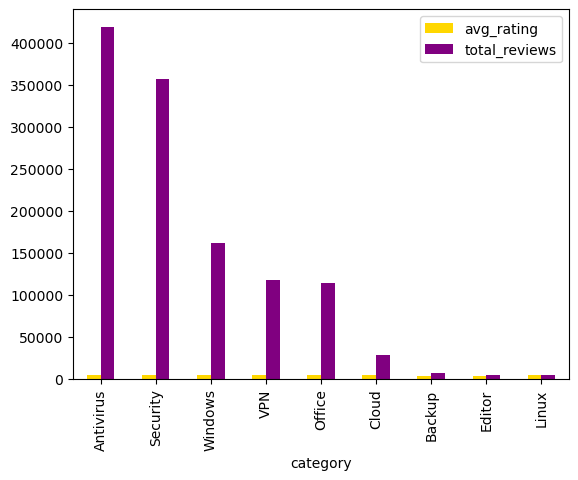

In [36]:
aver_ratings["avg_rating"]=aver_ratings["avg_rating"]*1000
aver_ratings.plot(kind="bar",color=["gold","purple"])

In [37]:
#average ratings per country

ratings_country=amazon_data.groupby("country")["product_num_ratings"].mean()
print(ratings_country)

country
AU     676.178507
BE     234.810970
CA     483.181099
DE    3525.498023
ES     593.564627
FR     362.867628
GB    2637.197313
IN    2910.571429
IT    1000.770679
JP     895.026716
MX     638.882910
NL     473.795821
PL     679.669254
SE     422.294395
SG    1364.048284
US    2430.063026
Name: product_num_ratings, dtype: float64


Text(0, 0.5, 'ratings')

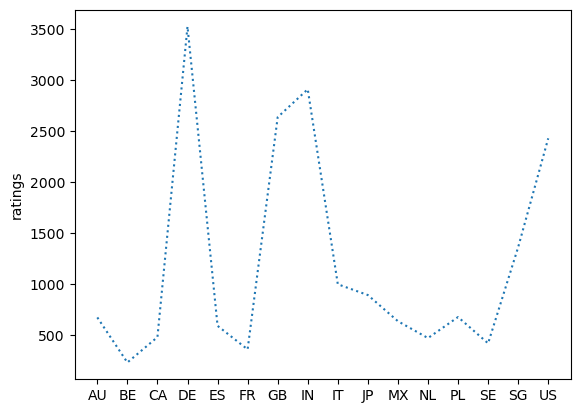

In [44]:
plt.plot(ratings_country, linestyle = 'dotted')
plt.ylabel("ratings")

In [46]:
amazon_data["price_type"]=amazon_data["product_price"].apply(lambda x: "Free" if x==0 else "paid")
amazon_data["price_type"]
amazon_data[amazon_data["price_type"]==0].count()


product_title          0
product_price          0
product_star_rating    0
product_num_ratings    0
countryRank            0
country                0
category               0
price_type             0
dtype: int64

In [40]:
# comparison = amazon_data.groupby('price_type').agg({
#     'product_star_rating': 'mean',
#     'product_num_ratings': 'sum',
#     'product_price': 'mean'
# }).reset_index().rename(columns={
#     'product_star_rating': 'avg_rating',
#     'product_num_ratings': 'total_reviews',
#     'product_price': 'avg_price'
# })
# print(comparison)

In [47]:
#top rated software
average_prices=amazon_data.groupby("category")["product_price"].mean()
average_prices.head(10)


category
Antivirus     1537.662143
Backup       11289.418333
Cloud        13714.302174
Editor        3627.487277
Linux         3218.532795
Office        6436.009058
Security      3782.907925
VPN           5332.810259
Windows       6046.445951
Name: product_price, dtype: float64

In [42]:
amazon_data["product_star_rating"].corr(amazon_data["product_num_ratings"])

0.1383336307957282

<Axes: >

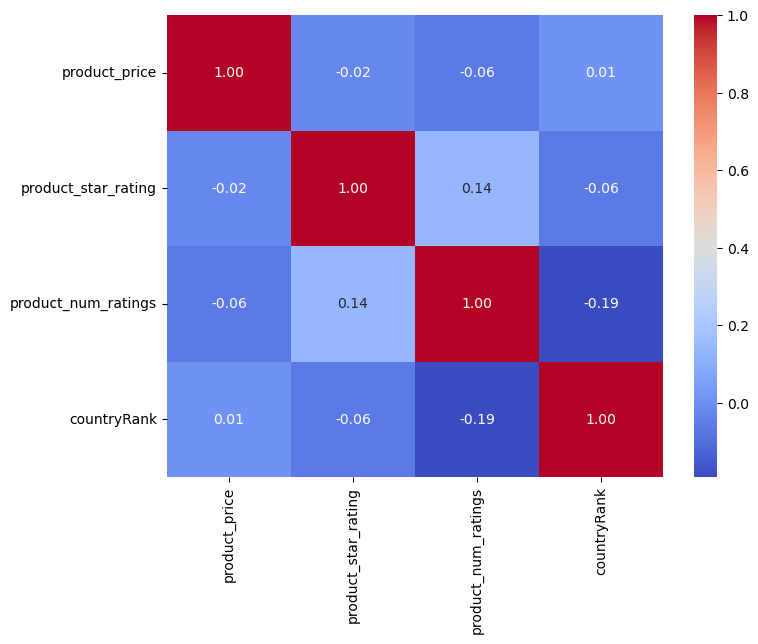

In [43]:
corr_col=["product_price","product_star_rating","product_num_ratings","countryRank"]

co_relation=amazon_data[corr_col].dropna().corr()

plt.figure(figsize=(8,6))
sns.heatmap(co_relation,annot=True,cmap="coolwarm",fmt=".2f")